In [1]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

if "__file__" in globals():
    sys.path.append(str((Path(__file__).parent / "..").resolve()))
else:
    sys.path.append(str(Path(os.getcwd(), "..").resolve()))

import dezero.functions as F
from dezero import Variable

In [2]:
x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)

In [3]:
logs = [y.data]

In [4]:
for i in range(3):
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

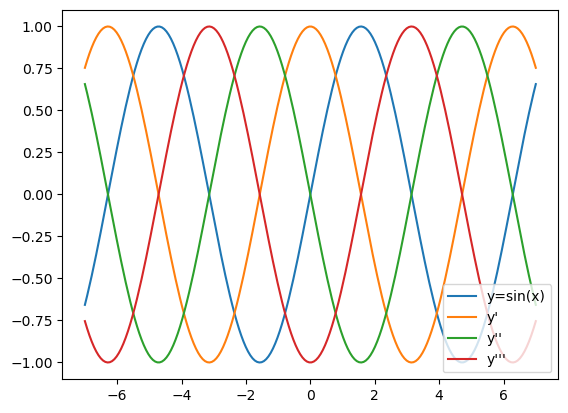

In [5]:
labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc="lower right")
plt.show()